<a href="https://colab.research.google.com/github/ttogle918/AI_projects/blob/master/s1_vgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "다음 분기에 어떤 게임을 설계해야 할까"를 도출하는 과정 / 결과 보여주기

dataset read, 어떤 게임을 만들어야 하는지 결론 도출

요구사항.
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

-----------------

data 이름 설명
+ Name : 게임의 이름입니다.
+ Platform : 게임이 지원되는 플랫폼의 이름입니다.
+ Year : 게임이 출시된 연도입니다.
+ Genre : 게임의 장르입니다.
+ Publisher : 게임을 제작한 회사입니다.
+ NA_Sales : 북미지역에서의 출고량입니다.
+ EU_Sales : 유럽지역에서의 출고량입니다.
+ JP_Sales : 일본지역에서의 출고량입니다.
+ Other_Sales : 기타지역에서의 출고량입니다.


-----------------
부가설명

아래 Sales의 기준은 100만(M)이다.
- 1k = one thousand (1,000)
- 10k = ten thousand (10,000)
- 100k = 100 thousand (100,000)
- 1M = 1000K (100만)

In [1]:
# google drive에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# csv파일 불러오기
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/vgames2.csv", engine='python')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
def toFloat(n) :
  try :
    return float(n)
  except ValueError :
    if n[-1] == 'M' :
      return float(n[0:-1])
    elif n[-1] == 'K' :
      return float(n[0:-1])/1000
    else :
      print(n)
  return 'cannot toInt' # 1개라도 있으면 dtype이 object가 됨

def setYear(y) :
  if y > 2021 :
    print(y)
    return '-1'
  if y > 99 :
    return int(y)
  elif y < 22 :
    return int(2000 + y)
  elif y > 21 :
    return int(1900 + y)

# 계산을 위해 data를 숫자형으로 변환 
df['NA_Sales'] = df['NA_Sales'].apply(toFloat)
df['EU_Sales'] = df['EU_Sales'].apply(toFloat)
df['JP_Sales'] = df['JP_Sales'].apply(toFloat)
df['Other_Sales'] = df['Other_Sales'].apply(toFloat)

df['Year'] = df['Year'].apply(setYear)
df.isnull().sum() # 혹시나 0년 == 2000년일 수도 있으니까 year 변환 뒤 nan을 0으로 치환
df['Year'] = df['Year'].fillna(0)
print("min year ", min(df['Year']) )
print("max NA_Sales", max(df['NA_Sales']) )

min year  0.0
max NA_Sales 41.49


In [4]:
import matplotlib.pyplot as plt
import numpy as np
wide = df.pivot_table(index = 'Year', columns = 'Genre', values = 'Name', aggfunc=len)
wide = wide.fillna(0)
wide = wide[1:]
wide.tail()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2014.0,186.0,75.0,23.0,41.0,10.0,8.0,27.0,91.0,47.0,11.0,55.0,8.0
2015.0,253.0,53.0,21.0,39.0,14.0,6.0,19.0,78.0,34.0,15.0,62.0,17.0
2016.0,119.0,34.0,14.0,18.0,10.0,0.0,20.0,40.0,32.0,9.0,38.0,10.0
2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **각 연도별 출시된 비디오게임의 장르를 나타낸 선 그래프**

아래와 같이 Action 장르가 거의 매 해 가장 많이 출시되었다. 

이 차트를 보고 Action 장르가 실제로 판매량도 높은가 확인해보려고 한다.

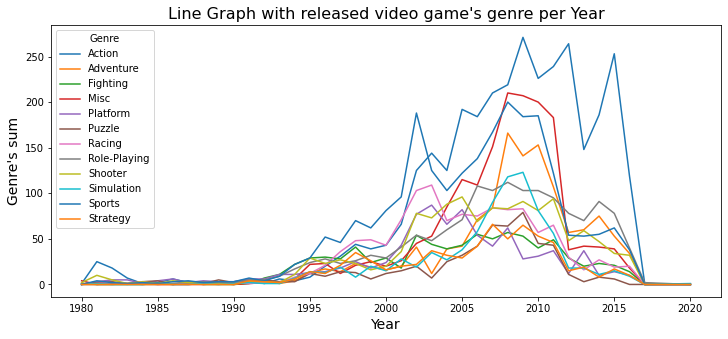

In [13]:
fig = wide.plot(kind='line', figsize=(12, 5))
plt.title('Line Graph with released video game\'s genre per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre\'s sum', fontsize=14)
plt.show()

나라별 장르 판매량의 평균 비교 (2015년부터 최근까지)

Action은 너무 폭이 넓고 puzzle은 좁다. 이런걸 scaling 할 수 있을까?

NA_Sales와 EU_Sales의 각각의 평균을 구한 뒤, 가설검정 가능?

or 개발 후, 차이가 작으면 두군데, 차이가 크면 한군데 출시한다고 생각했을 때, 가설검정 가능할 것 같다.

어떤 장르로할지? 어떤 플랫폼으로할지?도 비교하면 좋을것 같다.
ps끼리 ds끼리 묶기.


아래와 같이 플랫폼을 묶어서 계산하였다.
{'2600',

 '3DO',

 '3DS','N64', 'GC','GBA', 'NES', 'SNES', 'DS',

 'DC',

 'GB',

 'GEN',

 'GG',

 'NG',

 'PC',

 'PCFX',

 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',

 'SAT',

 'SCD',

 'SNES',

 'TG16',

 'WS',

 'Wii', 'WiiU',

 'X360', 'XB', 'XOne'}


 플레이스테이션 : ps3는 ps1 완벽 호환/ ps2를 호환은 한 모델 뿐이다. 
 그런점을 배제하고 생각하겠다. (개발할 때는 크게 다르지 않을 것으로 ㅅ ㅏ료된다.)

 닌텐도 ds, 닌텐도 64

 xb : 엑스박스 시리즈

In [6]:
labels = set(df['Genre'])
df_sample = df[df['Year'] >= 2015]

labels_platform = set(df_sample['Platform'])


def setPlatform(string) :
  if string in ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'] :
    return 'PS'
  elif string in ['3DS','N64', 'GC','GBA', 'NES', 'SNES', 'DS'] :
    return 'DS'
  elif string in ['X360', 'XB', 'XOne'] :
    return 'XB'
  elif string in ['Wii', 'WiiU'] :
    return 'Wii'
  return string
df_sample['Platform'] = df_sample['Platform'].apply(setPlatform)

df_sample['Sales_sum'] = df_sample['NA_Sales']+ df_sample['EU_Sales']+ df_sample['JP_Sales']+ df_sample['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
chart_sample = []
labels_sample = []
i = 0
for s in labels_platform :
  num = sum(df_sample[df_sample['Platform']==s].Sales_sum)
  if num > 0 :
    chart_sample.append(num)
    labels_sample.append(s)
    
print(chart_sample)
print(labels_sample)

[21.21, 33.81, 10.629999999999992]
['Wii', 'DS', 'PC']


https://zephyrus1111.tistory.com/36

파이 차트 예쁘게 그리기(계단형 글자 배열)

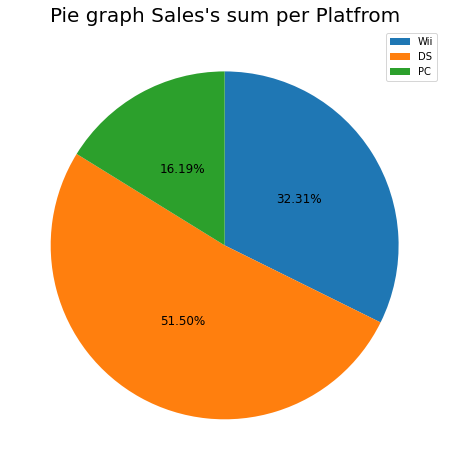

In [8]:
def drawPiePlot(labels, frequency) :
  fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
  fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
  ax = fig.add_subplot() ## 프레임 생성
  
  pie = ax.pie(frequency, ## 파이차트 출력
        startangle=90, ## 시작점을 90도(degree)로 지정
        counterclock=False, ## 시계방향으로 그려짐
        )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5 ## 상한선 비율
  sum_pct = 0 ## 퍼센티지
  
  bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
  
  ## annotation 설정
  config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
  
  for i,l in enumerate(labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
      
      if i < len(labels) - 1:
          sum_pct += float(f'{frequency[i]/total*100:.2f}')
          text = f'{frequency[i]/total*100:.2f}%'
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          text = f'{100-sum_pct:.2f}%'
      
      ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
      if frequency[i]/total*100 < threshold:
          ang = (ang1+ang2)/2 ## 중심각
          x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
          y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
          
          ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
          ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
          horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
          connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
          config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
          ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                      horizontalalignment=horizontalalignment, **config)
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          ax.text(x,y,text,ha='center',va='center',fontsize=12)

  plt.title('Pie graph Sales\'s sum per Platfrom', fontsize=20)
  plt.legend(pie[0],labels,loc='upper right') ## 범례


drawPiePlot(labels_sample, chart_sample)

### bar chart로 표현 -> 고치기!

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


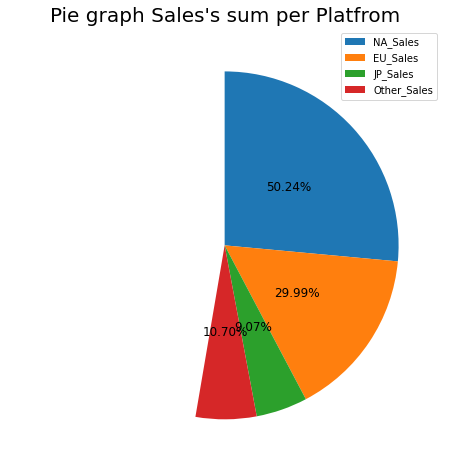

In [9]:
mean_Sales = []
mean_Sales.append(df[df['Genre'] == 'Action'].NA_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].EU_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].JP_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].Other_Sales.mean())

label_mean = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
print(label_mean)
drawPiePlot(label_mean, mean_Sales)

 Two-Sample T-test. (예시용)

 가설검정 예시.
 'Na_Sales(북미지역)'에서의 판매량은 'EU_Sales(유럽지역)'에서의 판매량과 같다(비슷하다)

In [10]:
# scipy를 upgrade해야 아래 코드 실행 가능.
# !pip install --upgrade scipy  

In [11]:
from scipy import stats
import numpy as np
game1 = pd.to_numeric(df['NA_Sales'])
game2 = pd.to_numeric(df['EU_Sales'])

print("Na :", np.mean(game1))
print("Na sum:", np.sum(game1))

print("EU :", np.mean(game2))
print("EU sum:", np.sum(game2))
sta, pv = stats.ttest_ind(game1, game2)

print(sta, pv)

Na : 0.26466742981082814
Na sum: 4392.95
EU : 0.14665200626581526
EU sum: 2434.13
15.831371100049903 3.0384925458019944e-56
